<font size = '5'> **The role of differential delays in integrating transient visual and proprioceptive information** </font>

link - https://www.frontiersin.org/articles/10.3389/fpsyg.2014.00050/full

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('grayscale')

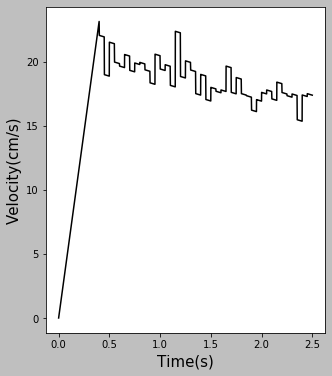

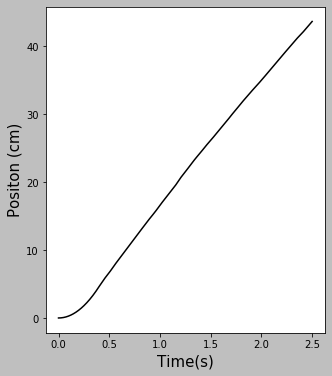

In [2]:
#create the velocity profile. fig 2A. 

#time
t = np.arange(0, 2.5, 0.001)

#velocity
v = np.zeros(len(t))

for i in range(len(t)):
    
    if t[i] < 0.4:
        
        v[i] = 58 * t[i]
    
    else:
        if i % 50 == 0:
            noise = np.random.normal(0, 1)
    
        v[i] = 22 - 2.38 * t[i] + noise


#calcualte the position
p = [sum(v[:i])/1000 for i in range(len(v))]
        
        
#plot
plt.figure(figsize = (5, 6))
plt.plot(t, v)
plt.xlabel('Time(s)', fontsize = 15)
plt.ylabel('Velocity(cm/s)', fontsize = 15)
plt.show()

plt.figure(figsize = (5, 6))
plt.plot(t, p)
plt.xlabel('Time(s)', fontsize = 15)
plt.ylabel('Positon (cm)', fontsize = 15)
plt.show()

In [3]:
#dfine the delays
d30 = 0.03
d40 = 0.04
d50 = 0.05
d60 = 0.06

def bias(delay, position):
    
    #constants
    sigma_v = 0.56
    sigma_p = 1

    #calculate the weights
    w_v, w_p = (1/sigma_v)/(1/sigma_v + 1/sigma_p), (1/sigma_p)/(1/sigma_p + 1/sigma_v)

    #append position
    pos_pv = np.zeros(len(t))
    
    for i in range(len(t)):

        if i < delay*1000:

            pos_pv[i] = w_p * p[i]

        else:
            
            iv = i - int(delay*1000)
            pos_pv[i] = w_p * p[i] + w_v * p[iv]
            
    return position - pos_pv

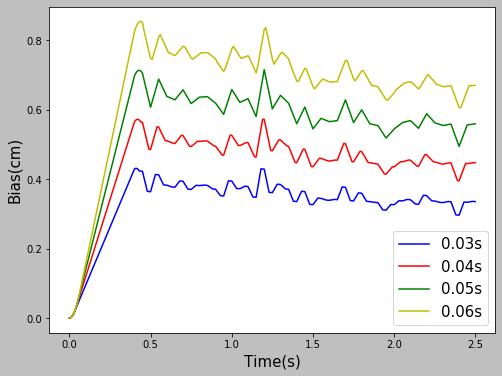

In [4]:
delay30 = bias(d30, p)
delay40 = bias(d40, p)
delay50 = bias(d50, p)
delay60 = bias(d60, p)

plt.figure(figsize = (8, 6))
plt.xlabel('Time(s)', fontsize = 15)
plt.ylabel('Bias(cm)', fontsize = 15)
plt.plot(t, delay30, color = 'b', label = '0.03s')
plt.plot(t, delay40, color = 'r', label = '0.04s')
plt.plot(t, delay50, color = 'g', label = '0.05s')
plt.plot(t, delay60, color = 'y', label = '0.06s')
plt.legend(fontsize = 15)
plt.show()

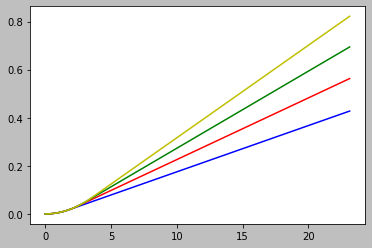

In [14]:
plt.plot(v[:400], delay30[:400], color = 'b')
plt.plot(v[:400], delay40[:400], color = 'r')
plt.plot(v[:400], delay50[:400], color = 'g')
plt.plot(v[:400], delay60[:400], color = 'y')

In [12]:
v[400]

22.055471252808616

In [8]:
len(delay30)

2500